In [1]:
from qaoa import QAOA, problems, mixers

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

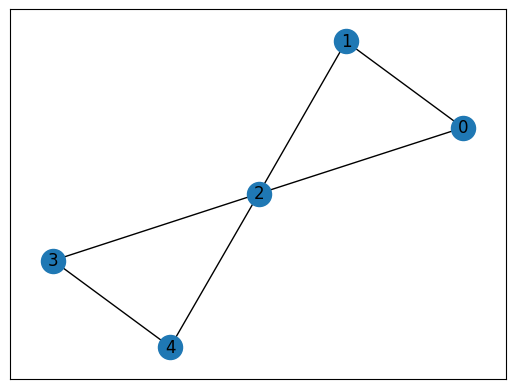

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

In [5]:
params = {
    'G': G,
    'shots': 2048
}
qaoamc = QAOA(
    problem=problems.MaxCut,
    mixer=mixers.Unconstrained,
    params=params
)
qaoamc.createParameterizedCircuit(1)
qaoamc.parameterized_circuit.draw()

┌───┐                                                          »
q5_0: ┤ H ├──■───────────────────────■────■───────────────────────■──»
      ├───┤┌─┴─┐┌─────────────────┐┌─┴─┐  │                       │  »
q5_1: ┤ H ├┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├──┼───────────────────────┼──»
      ├───┤└───┘└─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐»
q5_2: ┤ H ├─────────────────────────────┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├»
      ├───┤                             └───┘└─────────────────┘└───┘»
q5_3: ┤ H ├──────────────────────────────────────────────────────────»
      ├───┤                                                          »
q5_4: ┤ H ├──────────────────────────────────────────────────────────»
      └───┘                                                          »
c1: 5/═══════════════════════════════════════════════════════════════»
                                                                     »
«      ┌───────────────┐                                         »
«q5_0: ┤ Rx(-2*beta_0) ├─────────────────────────────────────────»
«      └───────────────┘                        ┌───────────────┐»
«q5_1: ────────■─────────────────────────────■──┤ Rx(-2*beta_0) ├»
«            ┌─┴─┐      ┌─────────────────┐┌─┴─┐└───────────────┘»
«q5_2: ──────┤ X ├──────┤ Rz(1.0*gamma_0) ├┤ X ├────────■────────»
«            └───┘      └─────────────────┘└───┘      ┌─┴─┐      »
«q5_3: ───────────────────────────────────────────────┤ X ├──────»
«                                                     └───┘      »
«q5_4: ──────────────────────────────────────────────────────────»
«                                                                »
«c1: 5/══════════════════════════════════════════════════════════»
«                                                                »
«                                                                            »
«q5_0: ──────────────────────────────────────────────────────────────────────»
«                                                                            »
«q5_1: ──────────────────────────────────────────────────────────────────────»
«                                                           ┌───────────────┐»
«q5_2: ─────────────────────■────■───────────────────────■──┤ Rx(-2*beta_0) ├»
«      ┌─────────────────┐┌─┴─┐  │                       │  └───────────────┘»
«q5_3: ┤ Rz(1.0*gamma_0) ├┤ X ├──┼───────────────────────┼──────────■────────»
«      └─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐      ┌─┴─┐      »
«q5_4: ────────────────────────┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├──────┤ X ├──────»
«                              └───┘└─────────────────┘└───┘      └───┘      »
«c1: 5/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                ░ ┌─┐            
«q5_0: ──────────────────────────────────────────░─┤M├────────────
«                                                ░ └╥┘┌─┐         
«q5_1: ──────────────────────────────────────────░──╫─┤M├─────────
«                                                ░  ║ └╥┘┌─┐      
«q5_2: ──────────────────────────────────────────░──╫──╫─┤M├──────
«                              ┌───────────────┐ ░  ║  ║ └╥┘┌─┐   
«q5_3: ─────────────────────■──┤ Rx(-2*beta_0) ├─░──╫──╫──╫─┤M├───
«      ┌─────────────────┐┌─┴─┐├───────────────┤ ░  ║  ║  ║ └╥┘┌─┐
«q5_4: ┤ Rz(1.0*gamma_0) ├┤ X ├┤ Rx(-2*beta_0) ├─░──╫──╫──╫──╫─┤M├
«      └─────────────────┘└───┘└───────────────┘ ░  ║  ║  ║  ║ └╥┘
«c1: 5/═════════════════════════════════════════════╩══╩══╩══╩══╩═
«                                                   0  1  2  3  4

In [ ]:
qaoamc.sample_cost_landscape(
    angles={
        'gamma':[0, np.pi/2, 10],
        'beta': [0, np.pi/2, 10]
    }
)